<a href="https://colab.research.google.com/github/heidiywseo/cost-estimation-building-permits/blob/main/cost_estimation_building_permits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will use Random Forest Regression to identify key factors that contribute to estimating construction costs using data on building permit approvals.

The dataset is available [here](https://drive.google.com/file/d/1FrIG1eFacSqKmlTsk2KCVnGjNvH1mkU9/view?usp=sharing).


In [ ]:
# Import common libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import data
df = pd.read_csv('Building_Permits.csv')

<ipython-input-3-6acdfdd41b23>:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Building_Permits.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [ ]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [ ]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


## Data Cleaning

In [ ]:
# Check for duplicate entries identified by the Permit Number
duplicates = df.duplicated(subset = 'Permit Number').sum()
duplicates

17405

In [ ]:
# Drop duplicate entries
df.drop_duplicates(subset='Permit Number', keep = 'first', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181495 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           181495 non-null  object 
 1   Permit Type                             181495 non-null  int64  
 2   Permit Type Definition                  181495 non-null  object 
 3   Permit Creation Date                    181495 non-null  object 
 4   Block                                   181495 non-null  object 
 5   Lot                                     181495 non-null  object 
 6   Street Number                           181495 non-null  int64  
 7   Street Number Suffix                    1547 non-null    object 
 8   Street Name                             181495 non-null  object 
 9   Street Suffix                           178841 non-null  object 
 10  Unit                                    26272 non

In [ ]:
# Check for missing/null values
df.isnull().sum()

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Number Suffix,179948
Street Name,0
Street Suffix,2654


<Axes: >

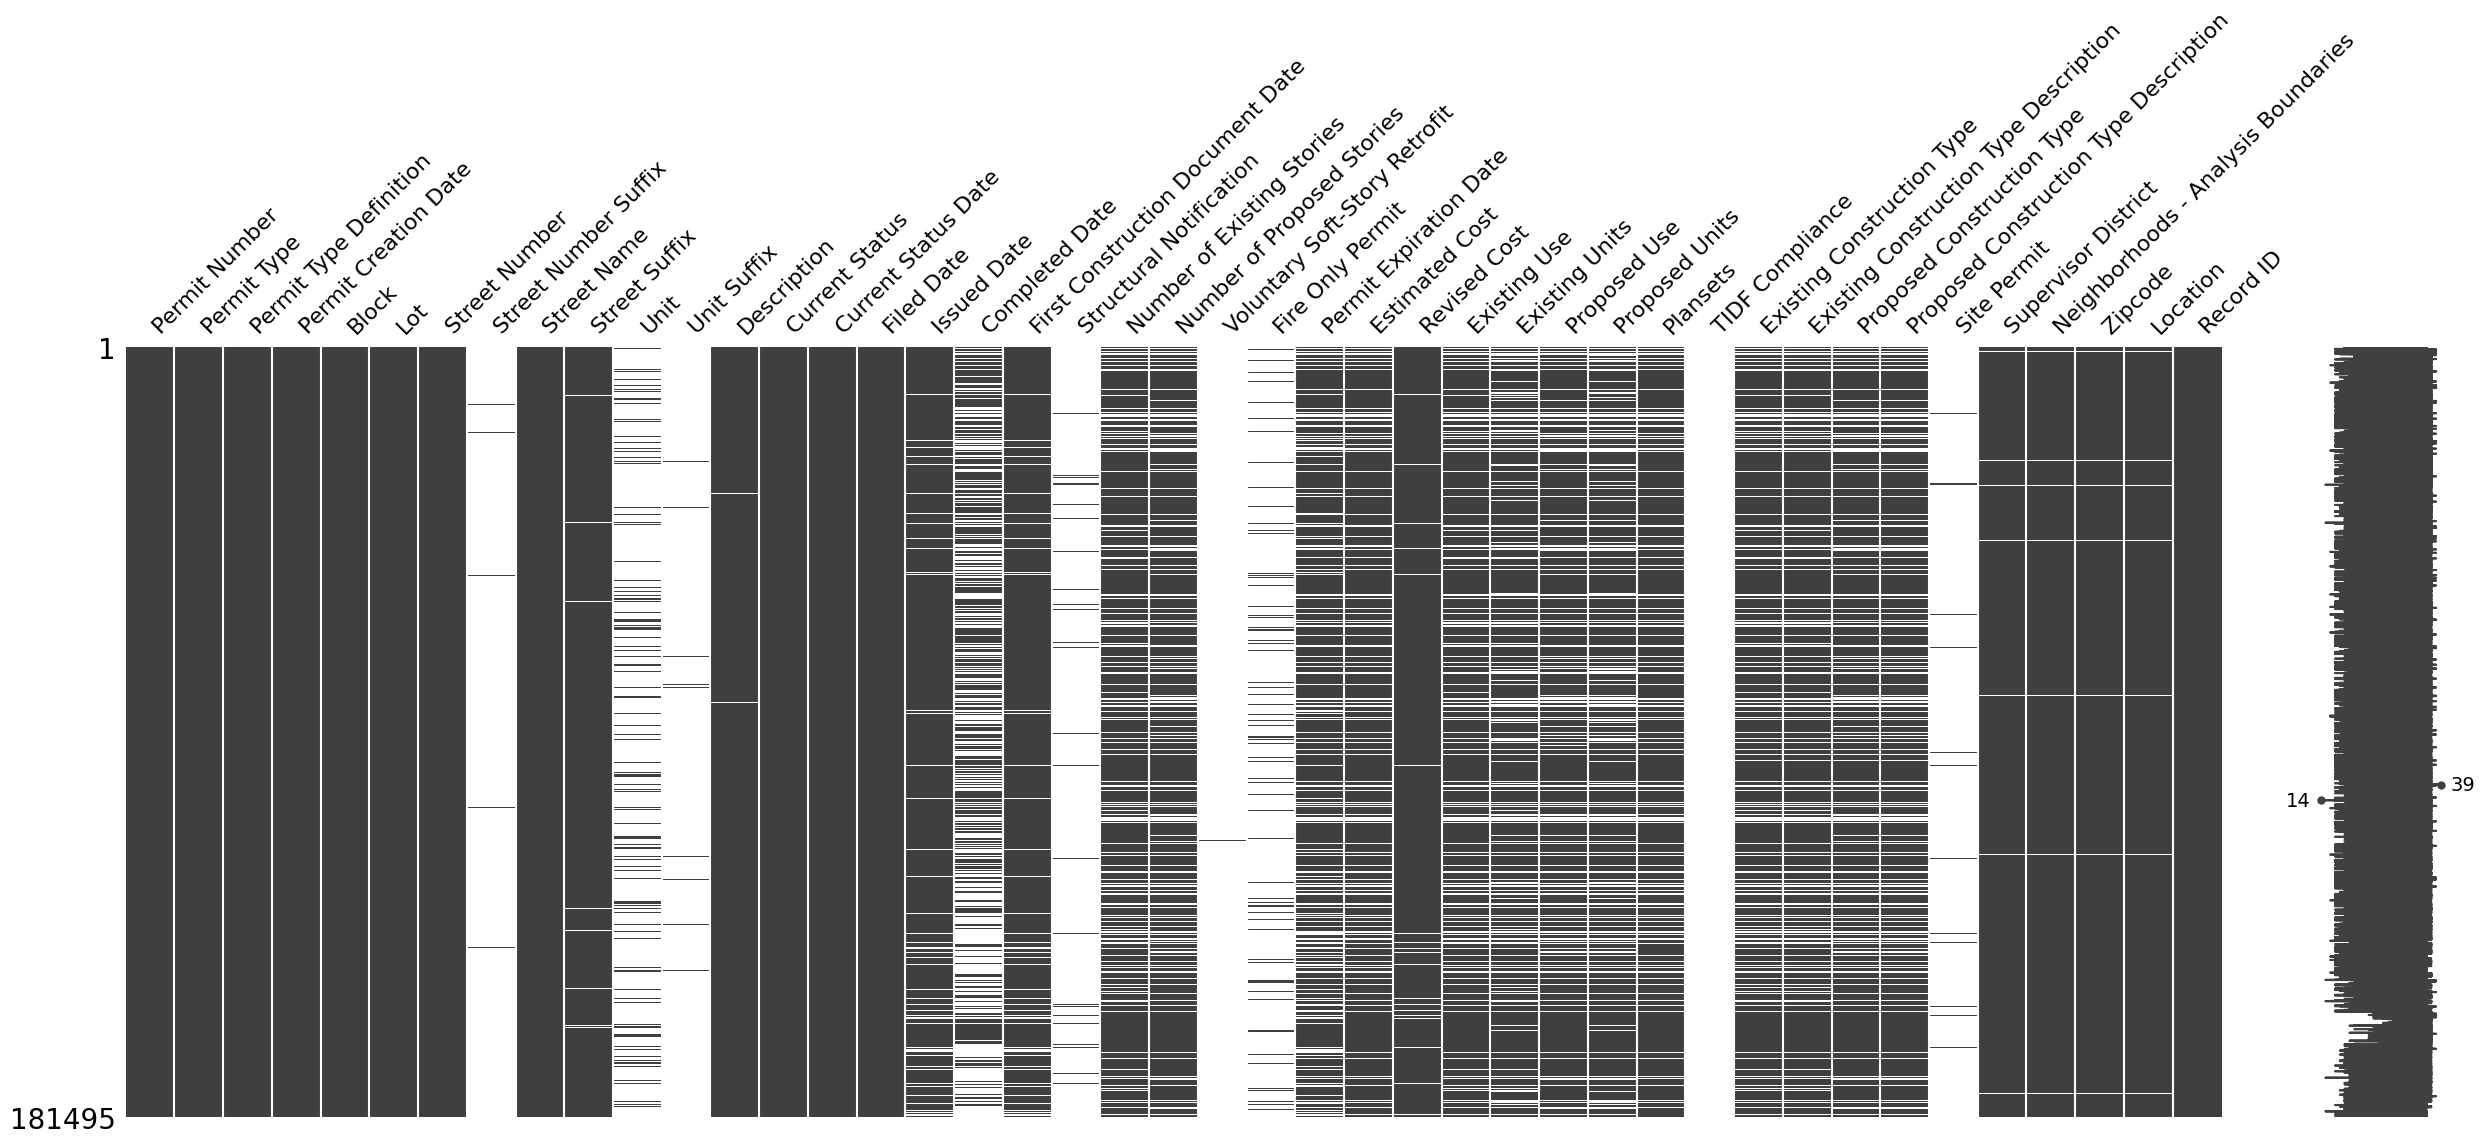

In [ ]:
# Visualize the missing data
import missingno

missingno.matrix(df, figsize = (30,10))

In [ ]:
# Fill in the columns where the cells were left null if 'No'
reformat_columns = ['Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance']

# Replace 'Y' with 1 and null with 0
df[reformat_columns] = df[reformat_columns].map(lambda x: 1 if x == 'Y' else 0)

In [ ]:
# Drop columns with too many missing values, especially if they will likely not contribute much to analysis
missing_perc = (df.isnull().sum() * 100) / len(df)
missing_perc

,0
Permit Number,0.000000
Permit Type,0.000000
Permit Type Definition,0.000000
Permit Creation Date,0.000000
Block,0.000000
Lot,0.000000
Street Number,0.000000
Street Number Suffix,99.147635
Street Name,0.000000
Street Suffix,1.462299


In [ ]:
# Identify columns with more than 80% of the data missing
col_drop = missing_perc[missing_perc > 80].keys()
col_drop

Index(['Street Number Suffix', 'Unit', 'Unit Suffix', 'Site Permit'], dtype='object')

In [ ]:
# Drop previously identified columns
df.drop(col_drop, axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181495 entries, 0 to 198899
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           181495 non-null  object 
 1   Permit Type                             181495 non-null  int64  
 2   Permit Type Definition                  181495 non-null  object 
 3   Permit Creation Date                    181495 non-null  object 
 4   Block                                   181495 non-null  object 
 5   Lot                                     181495 non-null  object 
 6   Street Number                           181495 non-null  int64  
 7   Street Name                             181495 non-null  object 
 8   Street Suffix                           178841 non-null  object 
 9   Description                             181220 non-null  object 
 10  Current Status                          181495 no

In [ ]:
# Drop Record ID since it will likely not contribute much to analysis (as mentioned in the column description)
df.drop('Record ID', axis = 1, inplace= True)

In [ ]:
df.isnull().sum()

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Name,0
Street Suffix,2654
Description,275


In [ ]:
# Handle remaining null values
# Consider grouped imputation

# Categorical columns
df['Street Suffix'].fillna('None', inplace=True) # will likely not have a significant impact on outcome
df['Description'].fillna('None', inplace=True) # descriptions will have no significant impact on outcome unless using text-based analysis
df['Existing Use'].fillna('Unknown', inplace=True)
df['Proposed Use'].fillna('Unknown', inplace=True)
df['Existing Construction Type'].fillna(0, inplace=True)
df['Proposed Construction Type'].fillna(0, inplace=True)
df['Existing Construction Type Description'].fillna('Unknown', inplace=True)
df['Proposed Construction Type Description'].fillna('Unknown', inplace=True)

In [ ]:
# Numerical values
# Replace null values with medians
df['Estimated Cost'].fillna(df['Estimated Cost'].median(), inplace=True)
df['Revised Cost'].fillna(df['Revised Cost'].median(), inplace=True)
df['Number of Proposed Stories'].fillna(df['Number of Proposed Stories'].median(), inplace=True)
df['Existing Units'].fillna(df['Existing Units'].median(), inplace=True)
df['Proposed Units'].fillna(df['Proposed Units'].median(), inplace=True)

In [ ]:
# Number of Existing Stories is handled separately since it is not applicable for certain data types

# Check permit types
unique_permit_types = df['Permit Type Definition'].unique()
print(unique_permit_types)

['sign - erect' 'additions alterations or repairs'
 'otc alterations permit' 'demolitions' 'wall or painted sign'
 'new construction' 'grade or quarry or fill or excavate'
 'new construction wood frame']


In [ ]:
#Permits likely requiring number of existing stories: 'additions alterations or repairs', 'new construction', 'new construction wood frame', 'otc alterations permit'
#Permits likely not requiring number of existing stories: 'demolitions', 'grade or quarry or fill or excavate', 'sign - erect', 'wall or painted sign'

permits_requiring_stories = [
    'additions alterations or repairs',
    'new construction',
    'new construction wood frame',
    'otc alterations permit'
]

# Filter rows with permit types that require story data and valid existing stories
valid_story_data = df[df['Permit Type Definition'].isin(permits_requiring_stories) & (df['Number of Existing Stories'].notna())]

# Median number of existing stories the filtered rows
median_existing_stories = valid_story_data['Number of Existing Stories'].median()

# Fill missing values for permits that require stories with the calculated median
df.loc[
    (df['Permit Type Definition'].isin(permits_requiring_stories)) & (df['Number of Existing Stories'].isna()),
    'Number of Existing Stories'
] = median_existing_stories

# Fill missing values for permits that don't require stories with 0
permits_not_requiring_stories = [
    'demolitions',
    'grade or quarry or fill or excavate',
    'sign - erect',
    'wall or painted sign'
]

df.loc[
    (df['Permit Type Definition'].isin(permits_not_requiring_stories)) & (df['Number of Existing Stories'].isna()),
    'Number of Existing Stories'
] = 0

In [ ]:
# Drop rows that are null in columns with a relatively small percentage of null values and difficulty replacing values
columns_to_check = ['Neighborhoods - Analysis Boundaries', 'Supervisor District', 'Zipcode', 'Location']
df.dropna(subset=columns_to_check, inplace=True)

# Replace null plansets values randomly with values that appear in the column
plansets_values = df['Plansets'].dropna()
df['Plansets'] = df['Plansets'].apply(lambda x: np.random.choice(plansets_values) if pd.isnull(x) else x)

# Null date data will not be filled to avoid distorting timeline representation

In [ ]:
df.isnull().sum()

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Name,0
Street Suffix,0
Description,0


In [ ]:
# Convert date columns to datetime
date_columns = ['Permit Creation Date', 'Filed Date', 'Issued Date',
                'Completed Date', 'First Construction Document Date',
                'Permit Expiration Date', 'Current Status Date']

for col in date_columns:
  df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179878 entries, 0 to 198885
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           179878 non-null  object        
 1   Permit Type                             179878 non-null  int64         
 2   Permit Type Definition                  179878 non-null  object        
 3   Permit Creation Date                    179878 non-null  datetime64[ns]
 4   Block                                   179878 non-null  object        
 5   Lot                                     179878 non-null  object        
 6   Street Number                           179878 non-null  int64         
 7   Street Name                             179878 non-null  object        
 8   Street Suffix                           179878 non-null  object        
 9   Description                             17

## Exploratory Data Analysis (EDA)

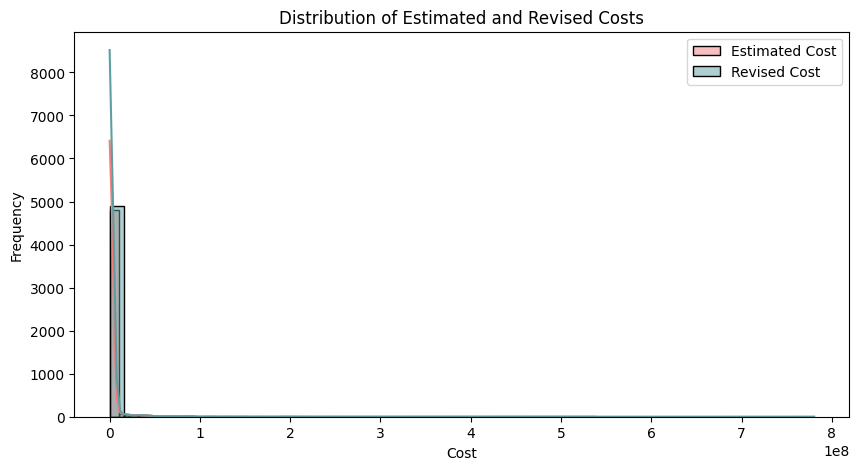

In [ ]:
# Plot Estimated and Revised Cost Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Estimated Cost'], bins=50, kde=True, color='lightcoral', label='Estimated Cost')
sns.histplot(df['Revised Cost'], bins=50, kde=True, color='cadetblue', label='Revised Cost')
plt.legend()
plt.title('Distribution of Estimated and Revised Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Highly skewed for the Estimated and Revised costs, indicating a potential problem that needs to be addressed
df[['Estimated Cost', 'Revised Cost']].describe()

,Estimated Cost,Revised Cost
count,1.798780e+05,1.798780e+05
mean,1.264369e+05,1.164666e+05
std,3.096404e+06,3.360484e+06
min,1.000000e+00,0.000000e+00
25%,5.000000e+03,1.000000e+00
50%,1.100000e+04,7.000000e+03
75%,2.500000e+04,2.500000e+04
max,5.379586e+08,7.805000e+08


In [ ]:
# 0, 1 have been entered as costs (unrealistic)
# Check how many rows have 0, 1 as the cost
estimated_cost_zero_one = df[df['Estimated Cost'].isin([0, 1])]
revised_cost_zero_one = df[df['Revised Cost'].isin([0, 1])]

# Count the number of rows for each
estimated_cost_count = len(estimated_cost_zero_one)
revised_cost_count = len(revised_cost_zero_one)

# Rows that have 0 or 1 in either column
combined_cost_count = len(df[(df['Estimated Cost'].isin([0, 1])) | (df['Revised Cost'].isin([0, 1]))])

print(f"Rows with 0 or 1 in Estimated Cost: {estimated_cost_count}")
print(f"Rows with 0 or 1 in Revised Cost: {revised_cost_count}")
print(f"Rows with 0 or 1 in either Estimated or Revised Cost: {combined_cost_count}")

Rows with 0 or 1 in Estimated Cost: 14828
Rows with 0 or 1 in Revised Cost: 50281
Rows with 0 or 1 in either Estimated or Revised Cost: 51832


In [ ]:
# Group the cost = 0, 1 by Permit to identify why 0, 1 have been entered
zero_one_costs = df[(df['Estimated Cost'] <= 1) | (df['Revised Cost'] <= 1)]
grouped_by_permit_type = zero_one_costs.groupby('Permit Type Definition').size()

print(grouped_by_permit_type)

Permit Type Definition
additions alterations or repairs         839
demolitions                                1
grade or quarry or fill or excavate        7
new construction                           1
new construction wood frame               62
otc alterations permit                 50888
sign - erect                              21
wall or painted sign                      14
dtype: int64


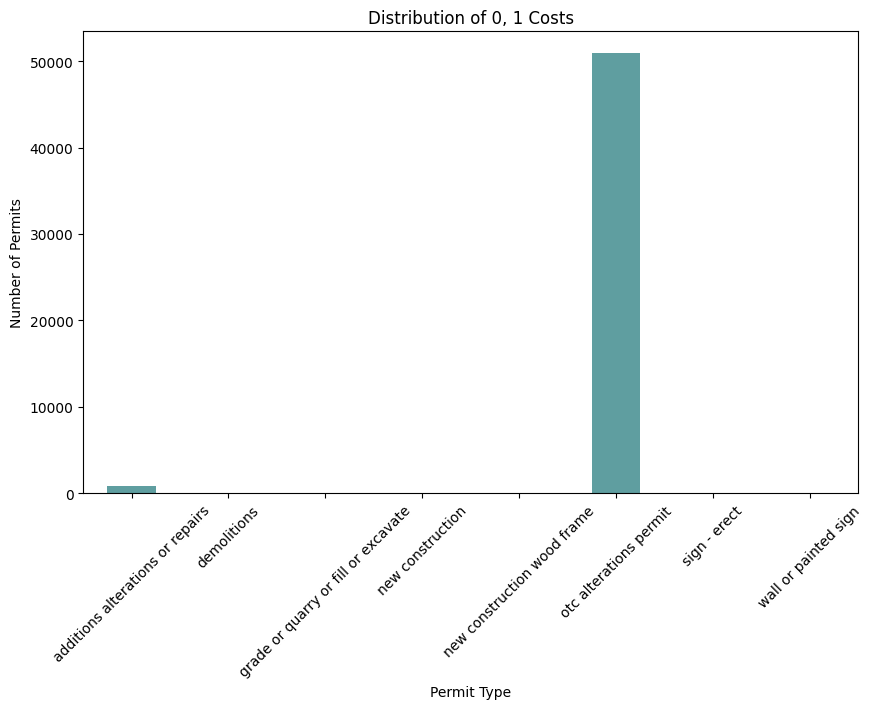

In [ ]:
plt.figure(figsize=(10,6))
grouped_by_permit_type.plot(kind='bar', color='cadetblue')
plt.title('Distribution of 0, 1 Costs')
plt.xlabel('Permit Type')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Most of the 0,1 values are from otc alterations permit (minor construction or alteration projects that don't require extensive plan reviews)
# Some in additions alterations or repairs

# Explore these rows
# Filter rows where Permit Type Definition is "otc alterations permit"
otc_permits = df[df['Permit Type Definition'] == 'otc alterations permit']

# Group by Current Status and get the count of each status
otc_status_counts = otc_permits['Current Status'].value_counts()

print(otc_status_counts)

Current Status
complete       82364
issued         70034
filed           6627
expired         1135
cancelled       1018
withdrawn        840
reinstated       373
suspend          125
revoked           42
approved          16
incomplete         2
plancheck          1
disapproved        1
Name: count, dtype: int64


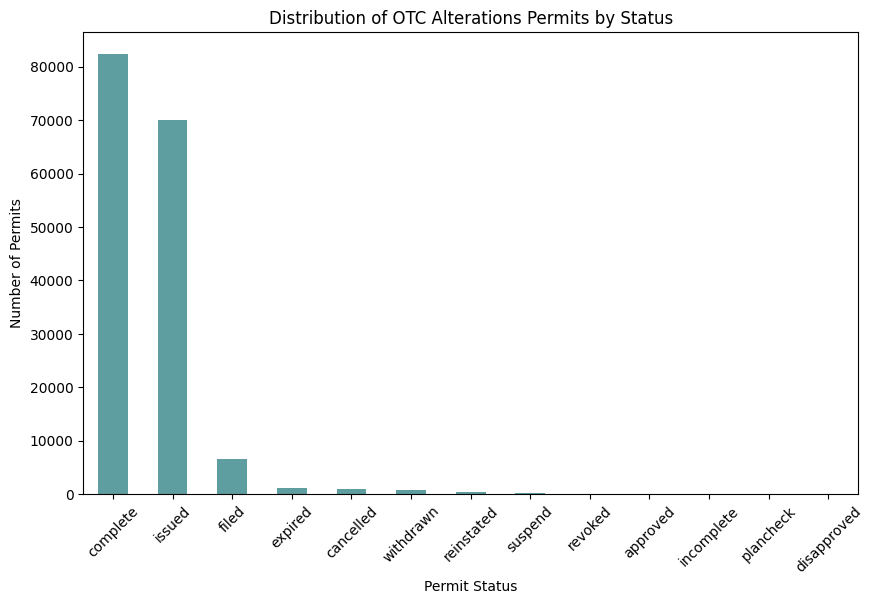

In [ ]:
# Bar chart of Current Status counts
plt.figure(figsize=(10,6))
otc_status_counts.plot(kind='bar', color='cadetblue')
plt.title('Distribution of OTC Alterations Permits by Status')
plt.xlabel('Permit Status')
plt.ylabel('Number of Permits')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop these rows
df = df[(df['Permit Type Definition'] != 'otc alterations permit') & (df['Permit Type Definition'] != 'additions alterations or repairs')]

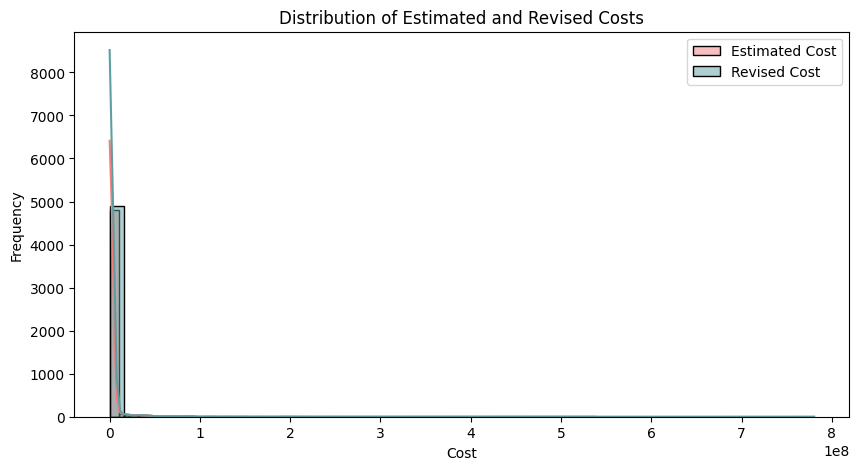

In [ ]:
# Plot Estimated and Revised Cost distribution again
plt.figure(figsize=(10,5))
sns.histplot(df['Estimated Cost'], bins=50, kde=True, color='lightcoral', label='Estimated Cost')
sns.histplot(df['Revised Cost'], bins=50, kde=True, color='cadetblue', label='Revised Cost')
plt.legend()
plt.title('Distribution of Estimated and Revised Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

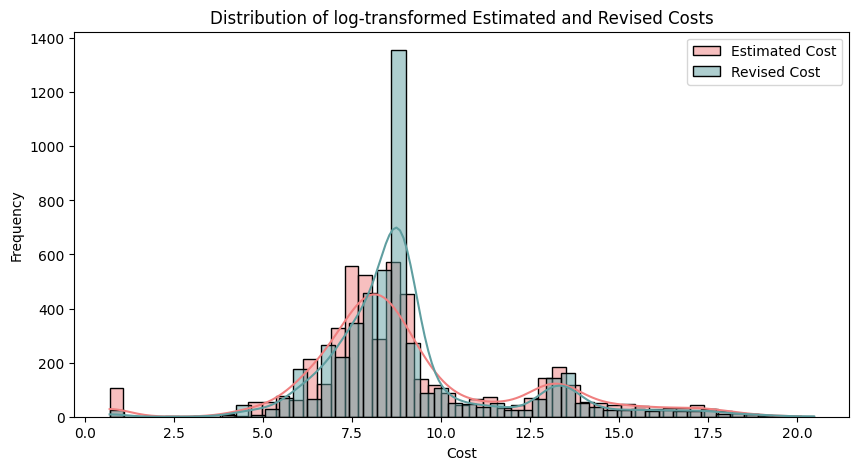

In [ ]:
# Still a wide range of values to be dealt with
# Log transformation to make the data more manageable
df['log_Estimated_Cost'] = np.log1p(df['Estimated Cost'])
df['log_Revised_Cost'] = np.log1p(df['Revised Cost'])

plt.figure(figsize=(10,5))
sns.histplot(df['log_Estimated_Cost'], bins=50, kde=True, color='lightcoral', label='Estimated Cost')
sns.histplot(df['log_Revised_Cost'], bins=50, kde=True, color='cadetblue', label='Revised Cost')
plt.legend()
plt.title('Distribution of log-transformed Estimated and Revised Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

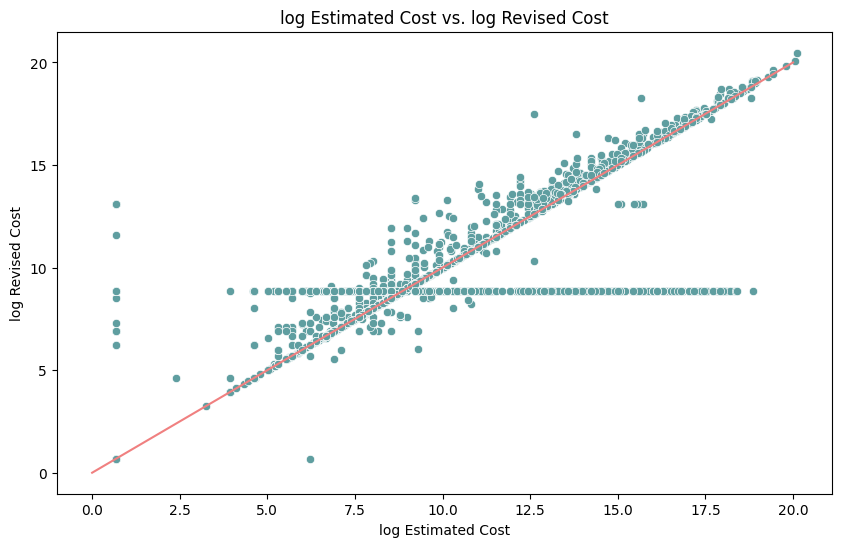

In [ ]:
# Scatter plot for Estimated vs. Revised Cost
plt.figure(figsize=(10,6))
sns.scatterplot(x='log_Estimated_Cost', y='log_Revised_Cost', data=df, color='cadetblue')

# Plot a slope 1 line over the scatterplot
x_vals = np.linspace(0, 20, 100)
y_vals = x_vals
plt.plot(x_vals, y_vals, color = 'lightcoral')

plt.title('log Estimated Cost vs. log Revised Cost')
plt.xlabel('log Estimated Cost')
plt.ylabel('log Revised Cost')
plt.show()

In [ ]:
# Correlation between with Revised Cost and Number of Existing Stories, Number of Proposed Stories, Existing Units, Proposed Units
columns_to_correlate = ['Number of Existing Stories', 'Number of Proposed Stories', 'Existing Units', 'Proposed Units']

# Calculate correlation with 'Revised Cost'
for column in columns_to_correlate:
    correlation_value = df['Revised Cost'].corr(df[column])
    print(f"Correlation between Revised Cost and {column}: {correlation_value}")

Correlation between Revised Cost and Number of Existing Stories: -0.022795676803663602
Correlation between Revised Cost and Number of Proposed Stories: 0.6717971924203289
Correlation between Revised Cost and Existing Units: -0.014978361921967697
Correlation between Revised Cost and Proposed Units: 0.4923017513924446


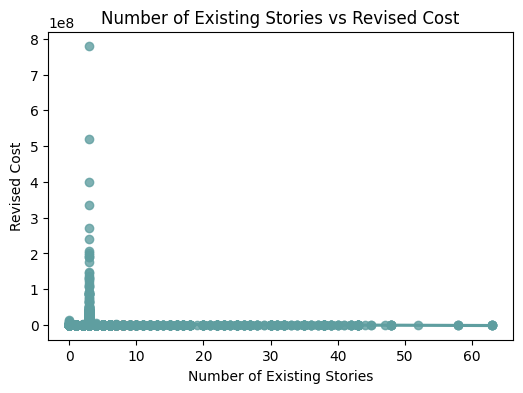

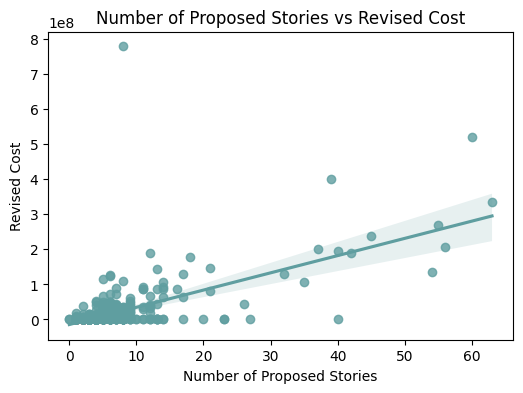

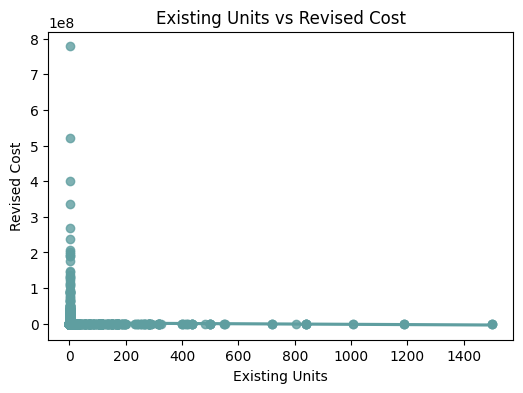

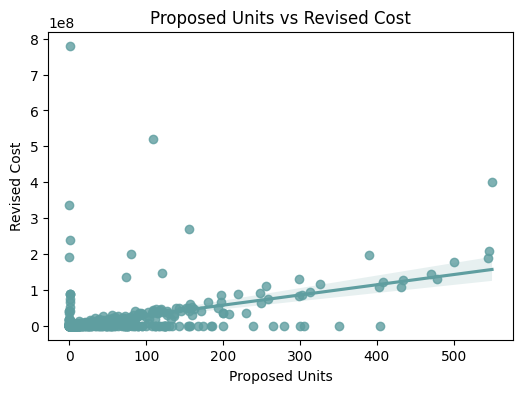

In [ ]:
for column in columns_to_correlate:
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[column], y=df['Revised Cost'], scatter = True, color='cadetblue')
    plt.title(f"{column} vs Revised Cost")
    plt.xlabel(column)
    plt.ylabel('Revised Cost')
    plt.show()

## Regression Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical values into numerical values
le = LabelEncoder()
df['Current Status'] = le.fit_transform(df['Current Status'])
df['Existing Use'] = le.fit_transform(df['Existing Use'])
df['Proposed Use'] = le.fit_transform(df['Proposed Use'])
df['Neighborhoods - Analysis Boundaries'] = le.fit_transform(df['Neighborhoods - Analysis Boundaries'])

In [ ]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df[['Permit Type', 'Street Number', 'Number of Existing Stories', 'Number of Proposed Stories', 'Voluntary Soft-Story Retrofit',
        'Fire Only Permit', 'Existing Use', 'Proposed Use', 'Existing Units', 'Proposed Units', 'Existing Construction Type', 'Proposed Construction Type',
        'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode']]

y = df['Revised Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Model Evaluation
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print(f"Random Forest - RMSE Train: {rmse_train_rf}, RMSE Test: {rmse_test_rf}")
print(f"Random Forest - R^2 Train: {r2_score(y_train, y_pred_train_rf)}, R^2 Test: {r2_score(y_test, y_pred_test_rf)}")

Random Forest - RMSE Train: 5660374.669885053, RMSE Test: 9532145.938875921
Random Forest - R^2 Train: 0.9260819101316207, R^2 Test: 0.2347134663920425


In [ ]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_

# DataFrame to map feature names to their importance scores
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                Feature  Importance
3            Number of Proposed Stories    0.556164
9                        Proposed Units    0.160981
14                              Zipcode    0.103492
7                          Proposed Use    0.073270
1                         Street Number    0.068729
13  Neighborhoods - Analysis Boundaries    0.019307
12                  Supervisor District    0.015230
11           Proposed Construction Type    0.001579
0                           Permit Type    0.001221
2            Number of Existing Stories    0.000012
8                        Existing Units    0.000010
6                          Existing Use    0.000003
10           Existing Construction Type    0.000001
4         Voluntary Soft-Story Retrofit    0.000000
5                      Fire Only Permit    0.000000


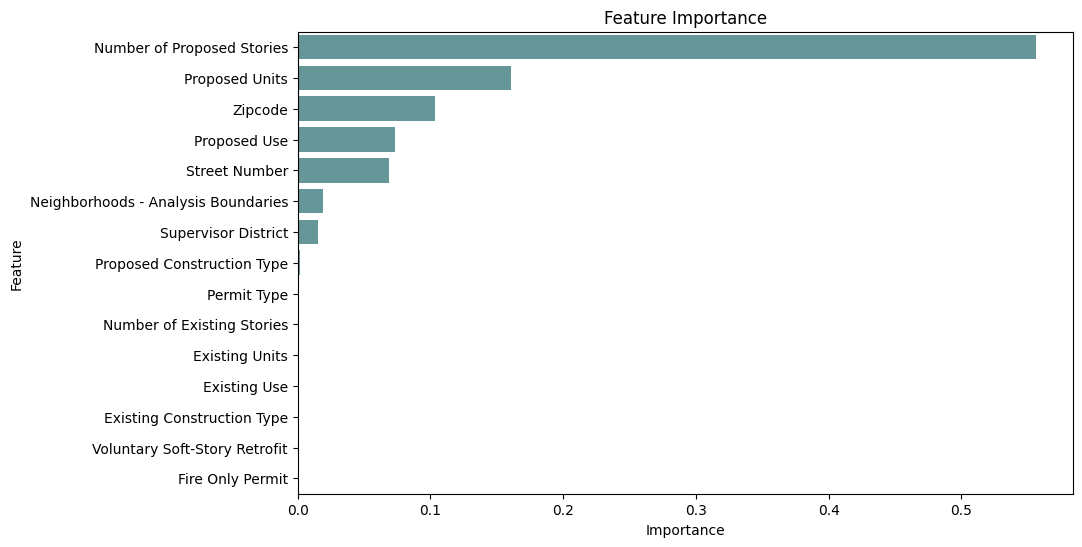

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color = 'cadetblue')
plt.title('Feature Importance')
plt.show()

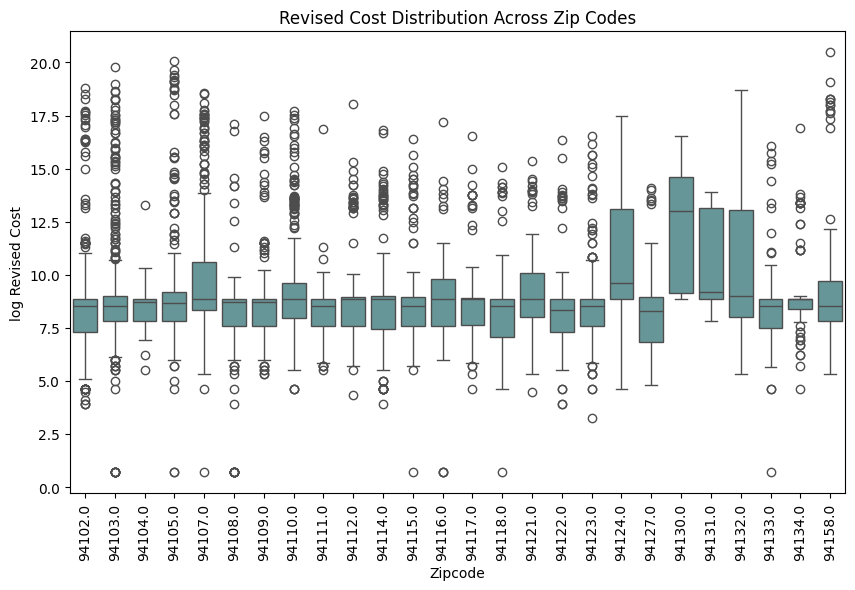

In [ ]:
# Explore Zipcodes and Revised Cost
plt.figure(figsize=(10,6))
sns.boxplot(x='Zipcode', y='log_Revised_Cost', data=df, color = 'cadetblue')

plt.xlabel('Zipcode')
plt.ylabel('log Revised Cost')
plt.title('Revised Cost Distribution Across Zip Codes')
plt.xticks(rotation=90)
plt.show()

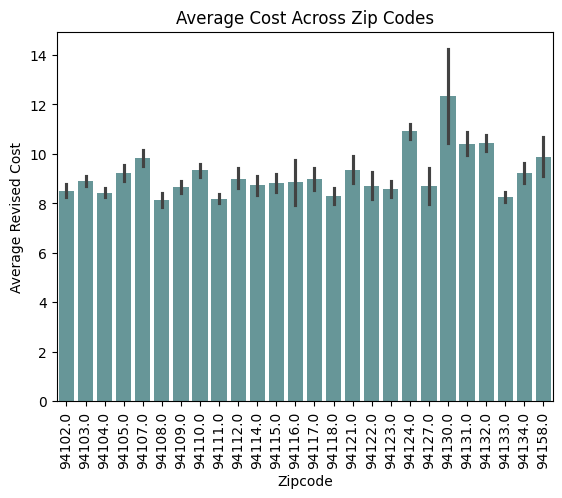

In [ ]:
sns.barplot(x='Zipcode', y='log_Revised_Cost', data=df, estimator=np.mean, color = 'cadetblue')

plt.xlabel('Zipcode')
plt.ylabel('Average Revised Cost')
plt.title('Average Cost Across Zip Codes')
plt.xticks(rotation=90)
plt.show()

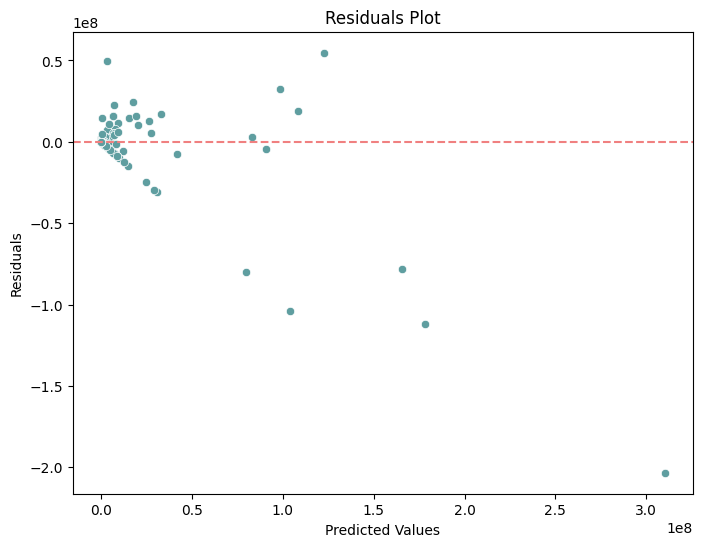

In [ ]:
# Calculate residuals for the test set
residuals = y_test - y_pred_test_rf

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_test_rf, y=residuals, color = 'cadetblue')
plt.axhline(0, color='lightcoral', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()